### 2.1 Загрузка данных: Быстрый просмотр

In [1]:
import pandas as pd
df = pd.read_csv ('data_clean/cleaned_final_cars_data.csv')
df.head(2)

/tmp/ipykernel_9499/872449665.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,model,year,price,total_km,hp,body,drive,fuel,location
0,Mitsubishi Lancer,2014,650000.0,100181.0,140.0,седан,передний,бензин,Москва
1,Mazda 3,2008,490000.0,213000.0,105.0,седан,передний,бензин,Свердловская область


In [2]:
df.dtypes

model        object
year          int64
price       float64
total_km    float64
hp          float64
body         object
drive        object
fuel         object
location     object
dtype: object

In [3]:
## Подробное описание стандартного отклонения 
## см. в нашем вспомогательном файле.

## В этом контексте стандартное отклонение 5,132224 означает, 
## что в среднем годы в вашем наборе данных отклоняются от среднего года примерно на 5,132224 года.
df.describe ()

,year,price,total_km,hp
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,2012.216407,696539.233911,137306.148161,132.765205
std,5.132224,155618.216508,84263.716593,48.952725
min,1940.000000,450000.000000,1.000000,22.000000
25%,2009.000000,565000.000000,82000.000000,106.000000
50%,2012.000000,685000.000000,130506.000000,122.000000
75%,2016.000000,819000.000000,179000.000000,147.000000
max,2021.000000,1000000.000000,960000.000000,510.000000


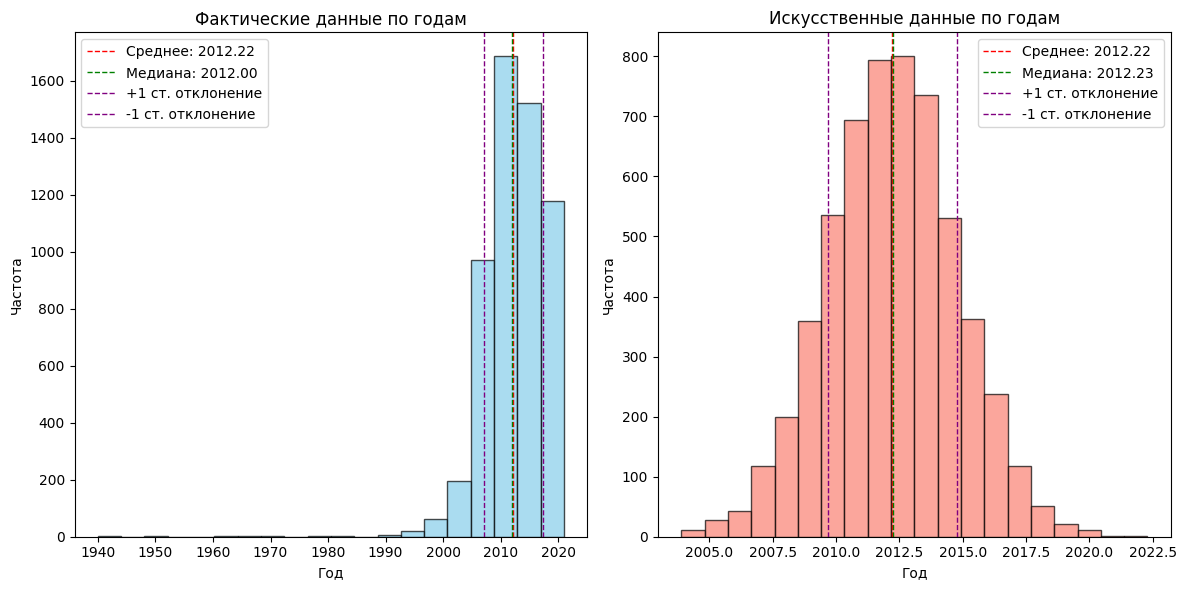

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Статистика по оригинальным данным
data_stats = {
    "count": 5656,
    "mean": 2012.216407,
    "std": 5.132224,
    "min": 1940,
    "25%": 2009,
    "50%": 2012,
    "75%": 2016,
    "max": 2021
}

# Генерация искусственных данных для столбца "year" с меньшим стандартным отклонением
np.random.seed(42)  # Для воспроизводимости результатов
artificial_years = np.random.normal(data_stats['mean'], data_stats['std'] / 2, data_stats['count'])

# Создание DataFrame с искусственными данными
df_artificial = pd.DataFrame({'year': artificial_years})

# Построение гистограмм рядом друг с другом
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для реальных данных
axs[0].hist(df['year'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Фактические данные по годам')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Частота')

# Добавление среднего, медианы и +-1 стандартного отклонения на график для фактических данных
mean_actual = df['year'].mean()
median_actual = df['year'].median()
std_dev_actual = df['year'].std()
axs[0].axvline(mean_actual, color='red', linestyle='dashed', linewidth=1, label=f'Среднее: {mean_actual:.2f}')
axs[0].axvline(median_actual, color='green', linestyle='dashed', linewidth=1, label=f'Медиана: {median_actual:.2f}')
axs[0].axvline(mean_actual + std_dev_actual, color='purple', linestyle='dashed', linewidth=1, label='+1 ст. отклонение')
axs[0].axvline(mean_actual - std_dev_actual, color='purple', linestyle='dashed', linewidth=1, label='-1 ст. отклонение')
axs[0].legend()

# Построение гистограммы для искусственных данных
axs[1].hist(df_artificial['year'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Искусственные данные по годам')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Частота')

# Добавление среднего, медианы и +-1 стандартного отклонения на график для искусственных данных
mean_artificial = df_artificial['year'].mean()
median_artificial = df_artificial['year'].median()
std_dev_artificial = df_artificial['year'].std()
axs[1].axvline(mean_artificial, color='red', linestyle='dashed', linewidth=1, label=f'Среднее: {mean_artificial:.2f}')
axs[1].axvline(median_artificial, color='green', linestyle='dashed', linewidth=1, label=f'Медиана: {median_artificial:.2f}')
axs[1].axvline(mean_artificial + std_dev_artificial, color='purple', linestyle='dashed', linewidth=1, label='+1 ст. отклонение')
axs[1].axvline(mean_artificial - std_dev_artificial, color='purple', linestyle='dashed', linewidth=1, label='-1 ст. отклонение')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
## Гистограмма - это графическое представление распределения данных по интервалам или категориям. 
## Она показывает частоту или относительную частоту появления значений в каждом интервале или категории.

## Стандартное отклонение - это мера разброса данных относительно их среднего значения. 
## Оно показывает, насколько значения данных распределены вокруг среднего значения, 
## при этом чем выше стандартное отклонение, тем больше разброс данных.

## Медиана - это значение, которое разделяет упорядоченный набор данных на две равные половины. 
## Если количество наблюдений нечетное, то медиана - это значение, находящееся посередине. 
## Если количество наблюдений четное, то медиана - это среднее арифметическое двух средних значений.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


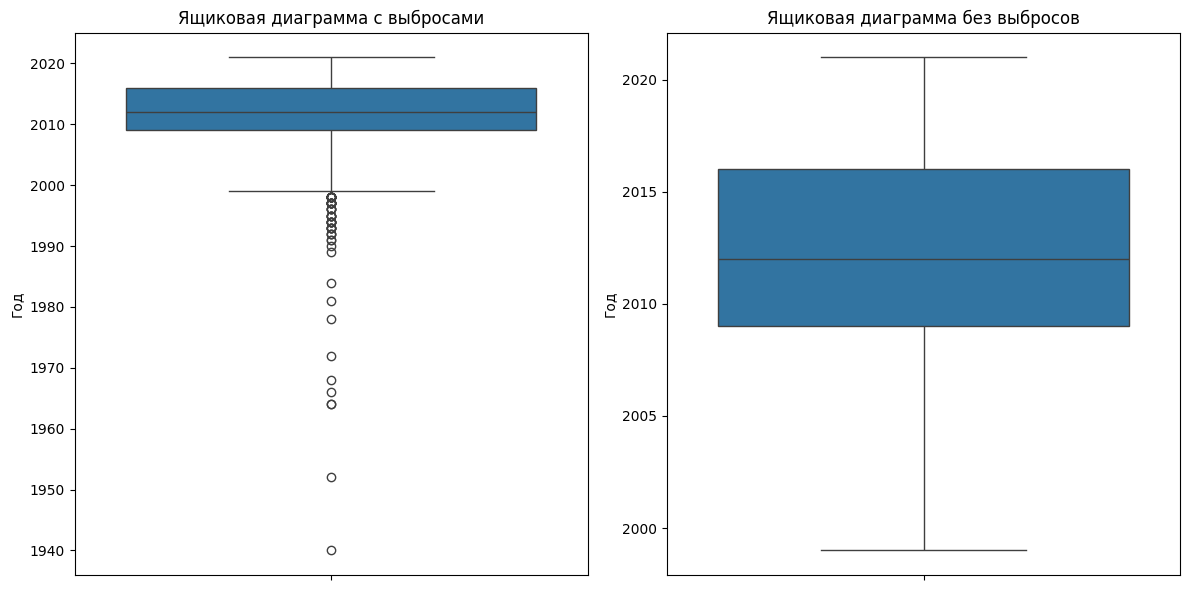

In [7]:
# pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot с выбросами
sns.boxplot(ax=axes[0], data=df, y='year')
axes[0].set_title('Ящиковая диаграмма с выбросами')
axes[0].set_ylabel('Год')

# Boxplot без выбросов
sns.boxplot(ax=axes[1], data=df, y='year', showfliers=False)
axes[1].set_title('Ящиковая диаграмма без выбросов')
axes[1].set_ylabel('Год')

plt.tight_layout()
plt.show()

In [8]:
## Ящик (box): Представляет интерквартильный размах (IQR), который охватывает 50% наблюдений. 
## Верхний и нижний края ящика обозначают первый (25-й процентиль) и третий (75-й процентиль) квартили соответственно. 
## Линия внутри ящика - это медиана (50-й процентиль).

## Усы (whiskers): Это линии, выходящие из ящика в обе стороны. 
## Они обозначают диапазон значений, который находится в пределах 1.5 * IQR от первого и третьего квартилей. 
## За пределами этого диапазона значения считаются выбросами и отображаются в виде отдельных точек или маркеров.

## Выбросы (outliers): Это отдельные значения, находящиеся за пределами усов. 
## Они могут представлять собой экстремальные значения или аномалии в данных.